## Step 4 – Task 2. Time Series Forecasting

In [1]:
!pip install --upgrade pip

In [2]:
!pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 34.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.3 which is incompatible.


In [3]:
!pip install statsmodels --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.8 MB/s eta 0:00:0000:0100:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 43.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.

In [4]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=02e0ebcc9cb33f1c7902f6ed691898f0a829894b74613a6d841204cf1d22908f
  Stored in directory: /Users/asathi/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


### import libraries

In [5]:
import os
import pandas as pd

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [6]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

if using_Google_colab:
    dir_input = "/content/drive/MyDrive/COVID_Project/input"
    dir_output = "/content/drive/MyDrive/COVID_Project/output"
if using_Anaconda_on_Mac_or_Linux:
    dir_input = "../input"
    dir_output = "../output"    
if using_Anaconda_on_windows:
    dir_input = r"..\input"  
    dir_output = r"..\output"  

In [7]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

### DM2.1 Open Notebook  and upload the state Analytics Base Table, select incremental cases / deaths for NJ and normalize - Activity 1 

In [8]:
df_abt_by_state = pd.read_csv(os.path.join(dir_output, 'abt_by_state.csv'),
                              index_col=['Date'], 
                              parse_dates=['Date'])
df_abt_by_state

,State,StateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-01-22,AL,1,0,NaN,NaN,0,NaN,NaN
2020-01-23,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-24,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-25,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-26,AL,1,0,0.0,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...
2022-01-23,CT,9,671674,0.0,4871.714286,9769,0.0,30.428571
2022-01-24,CT,9,683731,12057.0,4330.714286,9774,5.0,31.428571
2022-01-25,CT,9,687555,3824.0,4267.857143,9773,-1.0,29.857143


### Choose state - CA


In [9]:
df_abt_chosen_state = df_abt_by_state[df_abt_by_state['State'] == 'CA']
df_abt_chosen_state = df_abt_chosen_state.dropna()
df_abt_chosen_state

,State,StateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-02-03,CA,6,34,7.0,-104.571429,0,0.0,0.000000
2020-02-04,CA,6,38,4.0,-104.857143,0,0.0,0.000000
2020-02-05,CA,6,39,1.0,-105.285714,0,0.0,0.000000
2020-02-06,CA,6,43,4.0,-105.714286,0,0.0,0.000000
2020-02-07,CA,6,49,6.0,-107.000000,1,1.0,0.142857
...,...,...,...,...,...,...,...,...
2022-01-23,CA,6,7554303,85178.0,86585.428570,78010,175.0,118.714286
2022-01-24,CA,6,7626265,71962.0,83612.428570,78502,492.0,161.142857
2022-01-25,CA,6,7680316,54051.0,84924.714290,78533,31.0,160.857143


### DM2.2 Activity 2 - Compute Weekly Summaries

In [10]:
df_abt_chosen_state_weekly = df_abt_chosen_state.resample('W').sum()
df_abt_chosen_state_weekly

,StateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,
2020-02-09,42,374,62.0,-624.714286,3,1.0,0.428571
2020-02-16,42,803,49.0,61.285714,7,0.0,0.571429
2020-02-23,42,1326,102.0,74.714286,13,1.0,0.857143
2020-03-01,42,2565,245.0,177.000000,14,0.0,0.142857
2020-03-08,42,6201,803.0,519.428571,25,3.0,1.571429
...,...,...,...,...,...,...,...
2022-01-02,42,36901439,369608.0,244153.285720,529217,341.0,328.714286
2022-01-09,42,40726362,781916.0,546417.571410,532740,724.0,503.285714
2022-01-16,42,46361470,707414.0,805015.428600,538081,683.0,763.000000


### Normalize data

In [11]:
state_covid_cases = df_abt_chosen_state['Incremental Cases']
cases_max = state_covid_cases.max()
state_covid_cases = state_covid_cases/cases_max
state_covid_deaths = df_abt_chosen_state['Incremental Deaths']
deaths_max = state_covid_deaths.max()
state_covid_deaths = state_covid_deaths / deaths_max

### DM2.3 - Activity 3 - Compute seasonal_decompose 
Seasonal decomposition using moving averages.  It returns A object with seasonal, trend, and residual attributes.
(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
Attributes:
- x Time series. 
- model{“additive”, “multiplicative”}, (optional) Type of seasonal component. 
- filt array_like, (optional) The filter coefficients for filtering out the seasonal component. 
- period int, (optional) Period of the series. 
- two_sidedbool, (optional) The moving average method used in filtering. If True (default), a centered moving average is computed using the filt. If False, the filter coefficients are for past values only.
- extrapolate_trendint or ‘freq’, optional If set to > 0, the trend resulting from the convolution is linear least-squares extrapolated on both ends (or the single one if two_sided is False) considering this many (+1) closest points. 

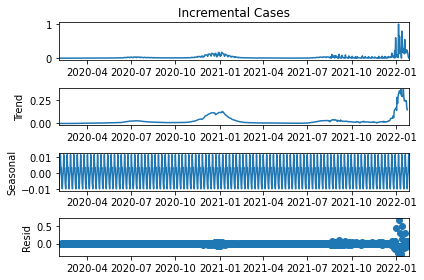

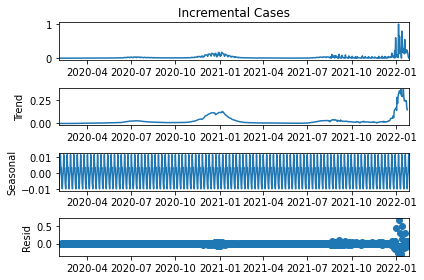

In [12]:
sd =seasonal_decompose(state_covid_cases)
sd.plot()

### Use Trend Data

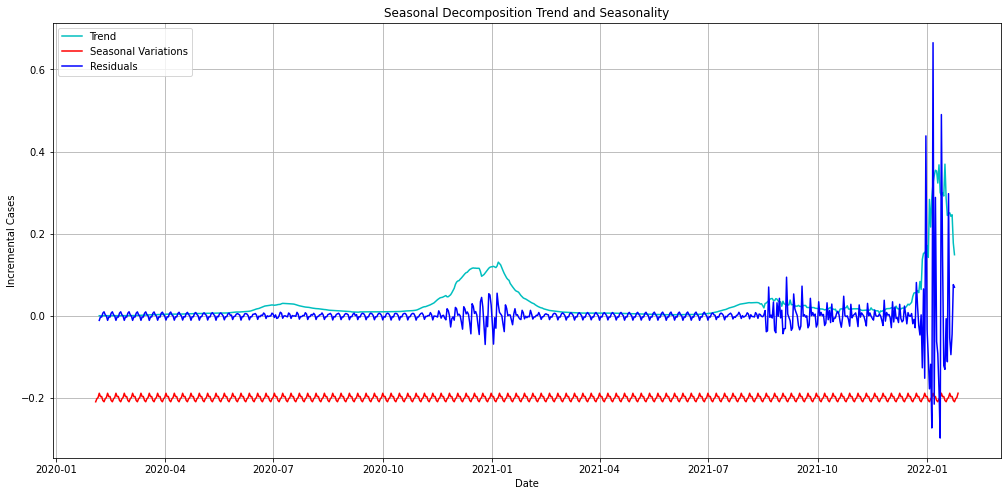

In [14]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal - 0.2, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
state_covid_cases_ewm_30 = state_covid_cases.ewm(span=30, adjust= False).mean()
cases_ewm_30_max = state_covid_cases_ewm_30.max()
state_covid_cases_ewm_30 = state_covid_cases_ewm_30/cases_ewm_30_max
train = state_covid_cases_ewm_30['2021-12-1':'2021-12-31']
test = state_covid_cases_ewm_30['2022-1-1':]

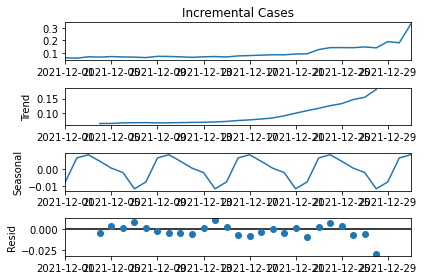

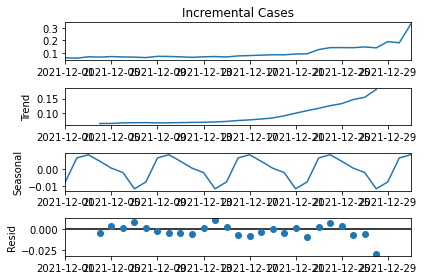

In [16]:
sd =seasonal_decompose(train)
sd.plot()

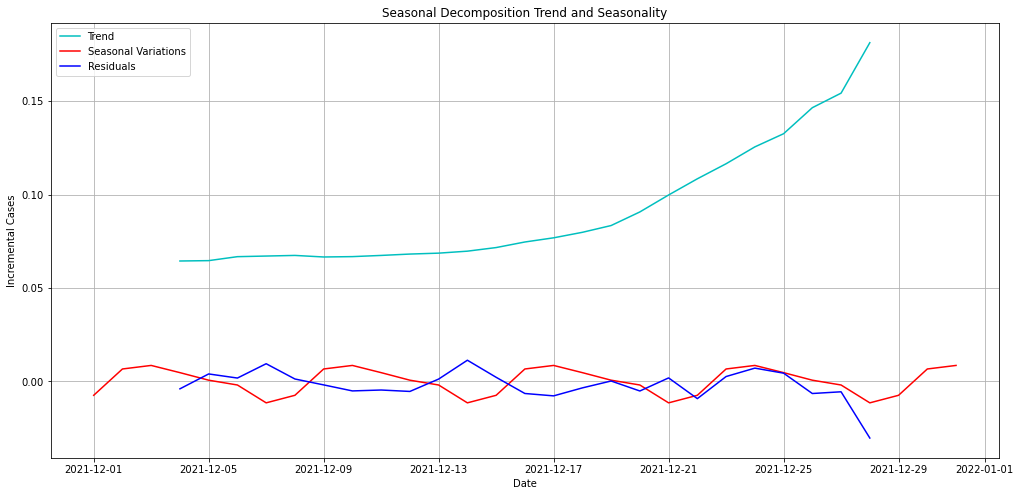

In [17]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

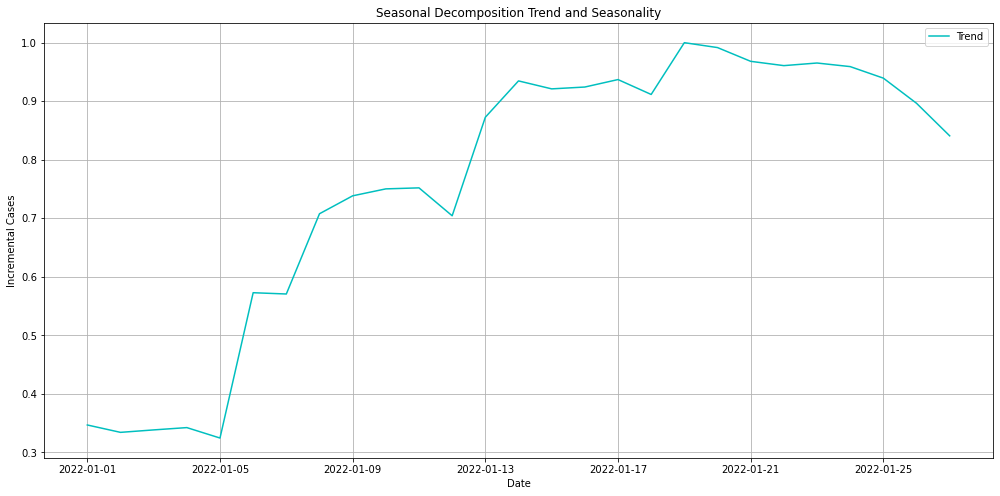

In [18]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(test, 'c', label='Trend')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## DM2.4 - Apply Holt’s algorithm to training and test sets


### Divide into training and test sets


In [20]:
test

Date
2022-01-01    0.346621
2022-01-02    0.334017
2022-01-03    0.338198
2022-01-04    0.342148
2022-01-05    0.324315
2022-01-06    0.572681
2022-01-07    0.570489
2022-01-08    0.707646
2022-01-09    0.738284
2022-01-10    0.750149
2022-01-11    0.751883
2022-01-12    0.704169
2022-01-13    0.872575
2022-01-14    0.934682
2022-01-15    0.921073
2022-01-16    0.924212
2022-01-17    0.936965
2022-01-18    0.911519
2022-01-19    1.000000
2022-01-20    0.991641
2022-01-21    0.968139
2022-01-22    0.960790
2022-01-23    0.965258
2022-01-24    0.959127
2022-01-25    0.939418
2022-01-26    0.896445
2022-01-27    0.840799
Name: Incremental Cases, dtype: float64

### Forecast using Holt algorithm various options:
- optimized
- Linear trend
- linear trend with dampening

### If you are using issues using plot as a method with ax, then please try plt.plot function

In [21]:
forecast_des =  Holt(train).fit(optimized=True)
forecast_des_1 = Holt(train).fit(smoothing_level=0.9, smoothing_slope=0.9, optimized=False)
forecast_des_2 = Holt(train, damped=True).fit(smoothing_level=1, smoothing_slope=1)

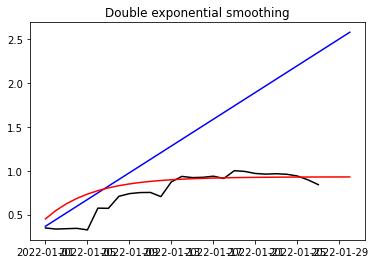

In [23]:
des_fcst = forecast_des.forecast(30).rename('Forecast')
des_fcst_1 = forecast_des_2.forecast(30).rename("damped trend")
#ax = test.plot(color="black",  figsize=(17,8), legend=True)
#des_fcst.plot(ax=ax, color='blue',legend=True)
#des_fcst_1.plot(ax=ax, color ="red", legend=True)
#des_fcst_2.plot(ax=ax, color='cyan', legend=True)
plt.plot(test, 'black', label='Test')
plt.plot(des_fcst, 'blue', label='Test')
plt.plot(des_fcst_2, 'red', label='Test')
plt.title("Double exponential smoothing")
plt.show()